![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating

**Анастасия Койро, группа 52 dst 38**

### В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   


# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# фиксируем RANDOM_SEED, чтобы эксперименты были воспроизводимы:
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

Загрузим датасеты и посмотрим, что в них содержится:

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
21639,id_2311,Vienna,NaN,2313.0,NaN,37.0,"[['Interesting place', 'What can I say'], ['07...",/Restaurant_Review-g190454-d5922033-Reviews-Si...,d5922033,1,3.5
43998,id_599,Zurich,"['Swiss', 'European']",603.0,$$ - $$$,30.0,"[['Great place', 'Great service. Traditional S...",/Restaurant_Review-g1463437-d3143718-Reviews-R...,d3143718,1,4.0
2517,id_2517,Lisbon,NaN,3359.0,NaN,7.0,"[['Great Neighbourhood Place'], ['07/06/2014']]",/Restaurant_Review-g189158-d6848557-Reviews-Fl...,d6848557,0,0.0
43315,id_15470,London,['Fast Food'],15482.0,$,13.0,"[['Expensive', 'Do yourself a favour- fast unt...",/Restaurant_Review-g186338-d4911475-Reviews-Ba...,d4911475,1,3.0
1101,id_1101,Stockholm,NaN,2447.0,NaN,49.0,"[['Lousy, not worh even the discount price I.....",/Restaurant_Review-g189852-d5541906-Reviews-Me...,d5541906,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 

In [15]:
#Посмотрим, как много пропусков содержит датасет
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

Пропуски есть не для каждого признака, но их довольно много. Заполним их далее в процессе обработки каждого столбца, подобрав оптимальную для этого стратегию. 

### 2. Обработка признаков
Рассмотрим данные по каждому признаку по-отдельности и проведем предварительную обработку. 

In [16]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Похоже, в данном датасете есть как количественные, так и категориальные признаки. Осуществим кодирование категориальных признаков в процессе рассмотрения признаков.

# "Price Range"

In [17]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  

In [18]:
data[data['Price Range'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0
10,id_10,Rome,NaN,1209.0,NaN,306.0,"[['Very pretentious, but drinks are top notch'...",/Restaurant_Review-g187791-d7818546-Reviews-Je...,d7818546,0,0.0
13,id_13,Hamburg,NaN,1000.0,NaN,30.0,"[['Surprisingly good pizza', 'Yummy'], ['09/28...",/Restaurant_Review-g187331-d1344523-Reviews-Il...,d1344523,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49988,id_4968,Berlin,NaN,4970.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,4.0
49989,id_8887,London,['International'],8896.0,NaN,NaN,"[['I love this place!'], ['08/24/2015']]",/Restaurant_Review-g186338-d5550626-Reviews-Th...,d5550626,1,5.0
49990,id_1187,Oporto,"['European', 'Portuguese']",1188.0,NaN,14.0,"[['Traditional ""home cooked"" food for an ""eco....",/Restaurant_Review-g189180-d3612719-Reviews-D_...,d3612719,1,4.5
49993,id_6057,Paris,NaN,6058.0,NaN,16.0,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",/Restaurant_Review-g187147-d10532509-Reviews-B...,d10532509,1,4.0


Данный столбец содержит много NaN значений. Для начала вынесем информацию о наличии пропусков как отдельный признак. Потом заменим ценовые категории числами.

In [19]:
# Вынесем информацию о наличии пропусков как отдельный признак
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [20]:
# Посмотрим на моду ценового диапазона по городам
data.groupby('City')['Price Range'].agg(pd.Series.mode)

City
Amsterdam     $$ - $$$
Athens        $$ - $$$
Barcelona     $$ - $$$
Berlin        $$ - $$$
Bratislava    $$ - $$$
Brussels      $$ - $$$
Budapest      $$ - $$$
Copenhagen    $$ - $$$
Dublin        $$ - $$$
Edinburgh     $$ - $$$
Geneva        $$ - $$$
Hamburg       $$ - $$$
Helsinki      $$ - $$$
Krakow        $$ - $$$
Lisbon        $$ - $$$
Ljubljana     $$ - $$$
London        $$ - $$$
Luxembourg    $$ - $$$
Lyon          $$ - $$$
Madrid        $$ - $$$
Milan         $$ - $$$
Munich        $$ - $$$
Oporto        $$ - $$$
Oslo          $$ - $$$
Paris         $$ - $$$
Prague        $$ - $$$
Rome          $$ - $$$
Stockholm     $$ - $$$
Vienna        $$ - $$$
Warsaw        $$ - $$$
Zurich        $$ - $$$
Name: Price Range, dtype: object

Как видим, мода ценового диапазона одинакова для всех городов.

In [21]:
# Заполним пустые значения модой
data['Price Range'].fillna((data['Price Range'].mode()[0]), inplace=True)


In [22]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Теперь можем изменить значения столбца Price Range на числовые.

In [23]:
# создаем словарь для замены значений столбца Price Range последовательными числами 1, 2 и 3
price_range_dict = {'$': 1,
                    '$$ - $$$': 2,
                    '$$$$': 3}

In [24]:
# заменяем значения на числовые
data['Price Range'] = data['Price Range'].map(price_range_dict)

In [25]:
data['Price Range'].value_counts(dropna=False)

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

Посмотрим, как соотносится ценовой диапазон с целевой переменной.

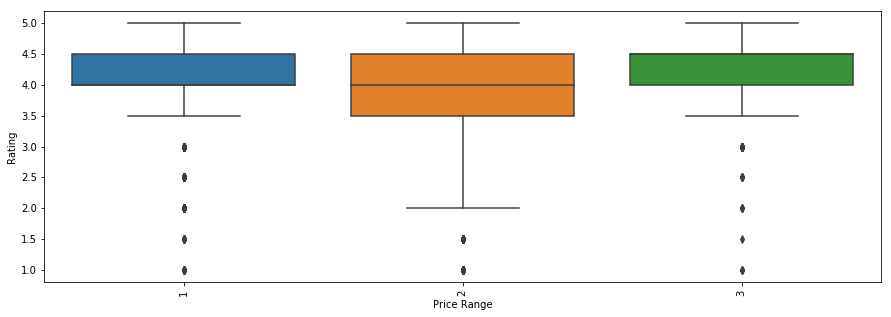

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Price Range', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

Интересно, что у дорогих и дешевых ресторанов рейтинги примерно одинаковые. И, что логично, наибольшая разбежка рейтингов приходится на самую большую категорию - рестораны со средней ценой.

Найдем среднее значение ценового диапазона по городам. Это значение будет давать информацию о том, какие города самые "дорогие".

In [27]:
data.groupby('City')['Price Range'].mean()

City
Amsterdam     1.871720
Athens        1.798969
Barcelona     1.856259
Berlin        1.862477
Bratislava    1.936842
Brussels      1.907915
Budapest      1.807052
Copenhagen    1.934066
Dublin        1.839713
Edinburgh     1.766443
Geneva        2.033898
Hamburg       1.940135
Helsinki      1.911579
Krakow        1.763538
Lisbon        1.822101
Ljubljana     1.819820
London        1.861949
Luxembourg    1.984791
Lyon          1.944938
Madrid        1.916077
Milan         1.845583
Munich        1.944105
Oporto        1.772586
Oslo          1.959016
Paris         1.926981
Prague        1.840308
Rome          1.788722
Stockholm     1.969022
Vienna        1.914761
Warsaw        1.886486
Zurich        1.981022
Name: Price Range, dtype: float64

Похоже,что больше всего дорогих ресторанов в Женеве, ибо только там среднее ценовое значение >2.
Добавим колонку, которая будет содержать данные о средней цене по городу.

In [28]:
# создаем словарь со средними значениями ценового диапазона по городам
city_mean_price = data.groupby('City')['Price Range'].mean().to_dict()

In [29]:
# добавим признак 'city_price'(среднее значение ценового дивпвзона по городам)
data['city_price'] = data['City'].map(city_mean_price)
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Price_Range_isNAN,city_price
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,1.926981
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,1.911579
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,1.766443
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,1.861949
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,1.936842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0,1.845583
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0,1.926981
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,1,1.969022
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0,1.886486


# Restaurant_id


Рассмотрим признак Restaurant_id:

In [30]:
data.Restaurant_id.value_counts()

id_436      19
id_227      19
id_871      19
id_633      19
id_585      18
            ..
id_14335     1
id_8092      1
id_11464     1
id_9447      1
id_14693     1
Name: Restaurant_id, Length: 13094, dtype: int64

Как видно, Restaurant_id - не уникальное значение. Для некоторых ресторанов оно повторяется. Можно предположть, что сетевые рестораны имеют одинаковый id. Выберем рестораны с одинаковым id:

In [31]:
data[data.Restaurant_id=='id_436']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Price_Range_isNAN,city_price
436,id_436,Lisbon,"['European', 'Portuguese']",2904.0,2,2.0,"[[], []]",/Restaurant_Review-g189158-d5003144-Reviews-Gu...,d5003144,0,0.0,1,1.822101
12955,id_436,Barcelona,"['Seafood', 'Mediterranean', 'Spanish', 'Glute...",437.0,2,546.0,"[['Fresh Fish', 'Perfect concept'], ['01/03/20...",/Restaurant_Review-g187497-d1592613-Reviews-La...,d1592613,1,4.5,0,1.856259
14674,id_436,Copenhagen,"['European', 'Spanish', 'Mediterranean', 'Vege...",437.0,2,89.0,"[['Lovely restaurant', 'Great atmosphere and g...",/Restaurant_Review-g189541-d8738362-Reviews-To...,d8738362,1,4.0,0,1.934066
16118,id_436,Oporto,"['European', 'Portuguese', 'Soups', 'Cafe', 'V...",437.0,1,71.0,"[['Super nice healthy and good', 'Great lunch ...",/Restaurant_Review-g189180-d9463122-Reviews-Ca...,d9463122,1,4.5,0,1.772586
16215,id_436,Budapest,"['American', 'Vegetarian Friendly', 'Vegan Opt...",437.0,1,68.0,"[['Excellent', 'Best burger ever!'], ['12/05/2...",/Restaurant_Review-g274887-d10438365-Reviews-B...,d10438365,1,4.5,0,1.807052
17377,id_436,Luxembourg,['Asian'],437.0,2,2.0,"[['ZEN'], ['06/11/2016']]",/Restaurant_Review-g190356-d743888-Reviews-Zen...,d743888,1,4.5,1,1.984791
18168,id_436,Oslo,"['European', 'Scandinavian']",437.0,3,51.0,"[['Stunning views over Oslo', 'Brilliant break...",/Restaurant_Review-g190479-d2036436-Reviews-Re...,d2036436,1,4.0,0,1.959016
18497,id_436,Milan,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",437.0,2,855.0,"[['Nice Napoli style pizza place', 'Great Neap...",/Restaurant_Review-g187849-d1553645-Reviews-Il...,d1553645,1,4.0,0,1.845583
22554,id_436,Ljubljana,NaN,437.0,2,14.0,"[['Terrible staff and service', 'Disrespectful...",/Restaurant_Review-g274873-d12607480-Reviews-C...,d12607480,1,3.0,1,1.819820
23313,id_436,Krakow,['Vegetarian Friendly'],437.0,2,18.0,"[['Great find, 100% recommend', 'Amazing brunc...",/Restaurant_Review-g274772-d12404722-Reviews-R...,d12404722,1,4.5,0,1.763538


# City

Посмотрим, какие города присутствут в датасете.

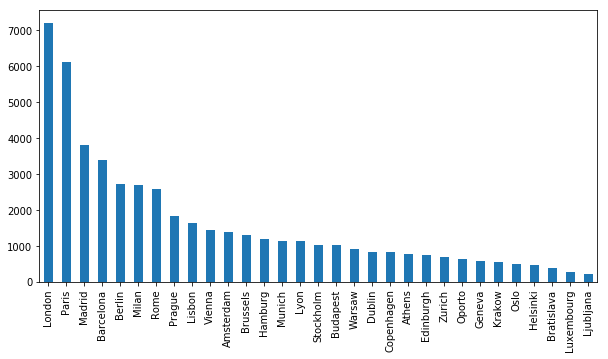

In [32]:
plt.figure(figsize=(10,5))
data.City.value_counts(dropna=False, ascending=False).plot(kind='bar');

В датасете присутствуют как столицы, так и просто крупные туристические города Европы. Одно название выглядит ошибочным - Oporto. Заменим его на Porto.

In [33]:
data.loc[data.City == 'Oporto', 'City'] = 'Porto'

Создадим признак restaurants_count, который будет обозначать количество ресторанов в конкретном городе. Возможно, он будет иметь влияние на модель. Чем больше ресторанов - тем больше конкуренция и, возможно, более высокие оценки?

In [34]:
# создадим словарь с количеством ресторанов в городе
rest_count_dict = dict(data['City'].value_counts())

In [35]:
# создадим новый столбец с информацией о количестве ресторанов в конкретном городе
data['restaurants_count'] = data.City.map(rest_count_dict)

In [36]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Price_Range_isNAN,city_price,restaurants_count
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,1.926981,6108
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,1.911579,475
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,1.766443,745
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,1.861949,7193
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,1.936842,380


Посмотрим на связь количества ресторанов в городе с целевой переменной

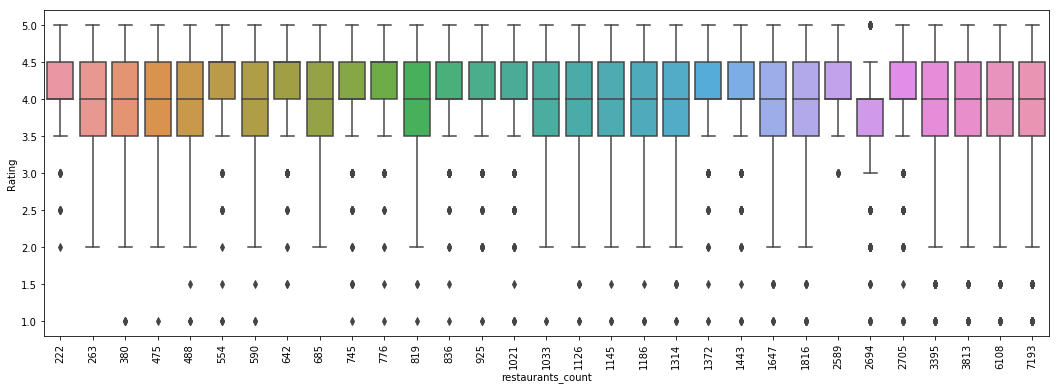

In [37]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='restaurants_count', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

In [38]:
# город, в котором рейтинг почти не поднимается выше 4.0.
data[data.restaurants_count==2694].head(1)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Price_Range_isNAN,city_price,restaurants_count
11,id_11,Milan,['Italian'],4234.0,2,36.0,"[['GREAT APERITIVO WITH STYLE', 'Disappointing...",/Restaurant_Review-g187849-d7209625-Reviews-M_...,d7209625,0,0.0,0,1.845583,2694


Похоже, рейтинг ресторанов не сильно различается для городов с большим и маленьким количеством ресторанов. В целом по городам большинство оценок приходится на диапазон 3.5-4.5, однако есть города, в которых рейтинг редко опускается ниже 4х. А в Милане, наоборот, ресторану сложно получить высокую оценку. Пока не совсем понятно, чем может быть обоснована данная тенденция. Но, наверное, есть смысл вынести города как dummy-переменные. 

In [39]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies.
# скопируем столбец для создания dummies, так как основной столбец City может пригодиться
data['city_dum'] = data['City'] 
data = pd.get_dummies(data, columns=['city_dum'])

Полезным для модели могут оказаться данные о количестве населения в городах.
Создадим словарь "город-население", из которого потом сделаем признак population.

In [40]:
population_dict = {
    'London':  8866541,
    'Edinburgh': 515855,
    'Paris': 6754282,
    'Lyon': 1076752,
    'Madrid': 3223334,
    'Barcelona': 1636762,
    'Berlin': 3644826,
    'Hamburg': 1841179,
    'Munich': 1456039,
    'Milan': 4106356,
    'Rome': 2872800,
    'Prague': 1294513,
    'Lisbon': 1859838,
    'Porto': 949694,
    'Vienna': 1766746,
    'Amsterdam': 960402,
    'Brussels': 1215289,
    'Stockholm': 1745766,
    'Budapest': 1752286,
    'Warsaw': 1735442, 
    'Krakow': 761873,
    'Dublin': 1325700,
    'Copenhagen': 559440,
    'Athens': 2622404,
    'Zurich': 677118,
    'Geneva': 407605,
    'Oslo': 623966,
    'Helsinki': 1154967,
    'Bratislava': 432864,
    'Luxembourg': 115227,
    'Ljubljana': 289518
}


In [41]:
#добавим столбец population
data['population'] = data.City.map(population_dict)

А теперь добавим еще один, возможно, полезный признак - количество ресторанов на душу населения.

In [42]:
# функция, которая будет считать, сколько ресторанов в городе на одного человека
def count_rest_per_person(row):
    return row.restaurants_count/row.population

In [43]:
# добавим признак rest_per_person - количество ресторанов в городе на одного человека
data['rest_per_person'] = data.apply(lambda row: count_rest_per_person(row), axis=1)

# Cuisine Style

Возьмем следующий признак - Cuisine Style. По описанию это кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане. Этот признак категориальный. Посмотрим, какие значения принимает данный признак:

In [44]:
data['Cuisine Style'].value_counts(dropna='False')

['Italian']                                                                                                            1332
['French']                                                                                                             1019
['Spanish']                                                                                                             860
['French', 'European']                                                                                                  503
['Cafe']                                                                                                                500
                                                                                                                       ... 
['Italian', 'Steakhouse', 'Caribbean', 'Pizza']                                                                           1
['Chinese', 'Asian', 'Yunnan', 'Vegetarian Friendly']                                                                     1
['Cajun 

In [45]:
data[data['Cuisine Style'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,city_dum_Paris,city_dum_Porto,city_dum_Prague,city_dum_Rome,city_dum_Stockholm,city_dum_Vienna,city_dum_Warsaw,city_dum_Zurich,population,rest_per_person
7,id_7,Budapest,NaN,2330.0,2,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,...,0,0,0,0,0,0,0,0,1752286,0.000583
10,id_10,Rome,NaN,1209.0,2,306.0,"[['Very pretentious, but drinks are top notch'...",/Restaurant_Review-g187791-d7818546-Reviews-Je...,d7818546,0,...,0,0,0,1,0,0,0,0,2872800,0.000901
13,id_13,Hamburg,NaN,1000.0,2,30.0,"[['Surprisingly good pizza', 'Yummy'], ['09/28...",/Restaurant_Review-g187331-d1344523-Reviews-Il...,d1344523,0,...,0,0,0,0,0,0,0,0,1841179,0.000644
18,id_18,Vienna,NaN,3360.0,2,2.0,"[[], []]",/Restaurant_Review-g190454-d8435085-Reviews-An...,d8435085,0,...,0,0,0,0,0,1,0,0,1766746,0.000817
20,id_20,Barcelona,NaN,6085.0,2,8.0,"[[], []]",/Restaurant_Review-g187497-d8334752-Reviews-Re...,d8334752,0,...,0,0,0,0,0,0,0,0,1636762,0.002074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,id_924,Lyon,NaN,925.0,2,29.0,"[[], []]",/Restaurant_Review-g187265-d5850306-Reviews-Re...,d5850306,1,...,0,0,0,0,0,0,0,0,1076752,0.001046
49983,id_2487,Amsterdam,NaN,2494.0,2,2.0,"[['Italian food, as in Italy!'], ['05/24/2015']]",/Restaurant_Review-g188590-d8120959-Reviews-Sa...,d8120959,1,...,0,0,0,0,0,0,0,0,960402,0.001429
49986,id_7274,Madrid,NaN,7279.0,2,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,1,...,0,0,0,0,0,0,0,0,3223334,0.001183
49988,id_4968,Berlin,NaN,4970.0,2,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,...,0,0,0,0,0,0,0,0,3644826,0.000742


Как видим, данные представлены в неудобном для дальнейшей работы строковом формате. Приведем данные к удобному формату, создадим список всех кухонь, представленных в ресторанах, а позже добавим dummy-переменные для каждой кухни. Пустые значения заменим на 'Other' и добавим признак, было ли значение Cuisine Style пустым. 

In [46]:
# вынесем информацию о наличии пропусков как отдельный признак
data['Cuisine_Style_isNAN'] = data['Cuisine Style'].isna().astype('uint8')

In [47]:
# заменяем NaN на [Other]
data['Cuisine Style'] = data['Cuisine Style'].fillna('[Other]') 


In [48]:
# удалим ненужные символы из Cuisine Style и преобразуем строку в список
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda cell: 
                        cell.replace('[', '').replace(']', '').replace('\'','').split(', '))


In [49]:
# создадим список, который будет содержать названия всех встречающихся типов кухонь
cuisines = data['Cuisine Style'].values
all_cuisines = set()
for c_list in cuisines:
    for cuisine in c_list:
        all_cuisines.add(cuisine)
all_cuisines

{'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free Options',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexic

In [50]:
# Функция, с помощью которой мы будем заполнять dummy-столбцы 0 или 1
def find_item(cell):
    if item in cell:
        return 1
    return 0

In [51]:
# создадим dummy-переменные для каждой кухни и заполним их 0 или 1 в зависимости от наличия типа кухни в ресторане
for item in all_cuisines:
    data[item] = data['Cuisine Style'].apply(find_item)

In [52]:
# создадим столбец, в котором указано количество кухонь, встречающихся в ресторане
data['cuisine_count'] = data['Cuisine Style'].apply(lambda x: len(x))

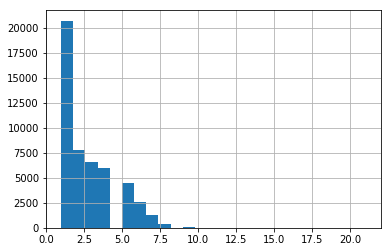

In [53]:
#посмотрим на распределение нового признака cuisine_count
data.cuisine_count.hist(bins=25)

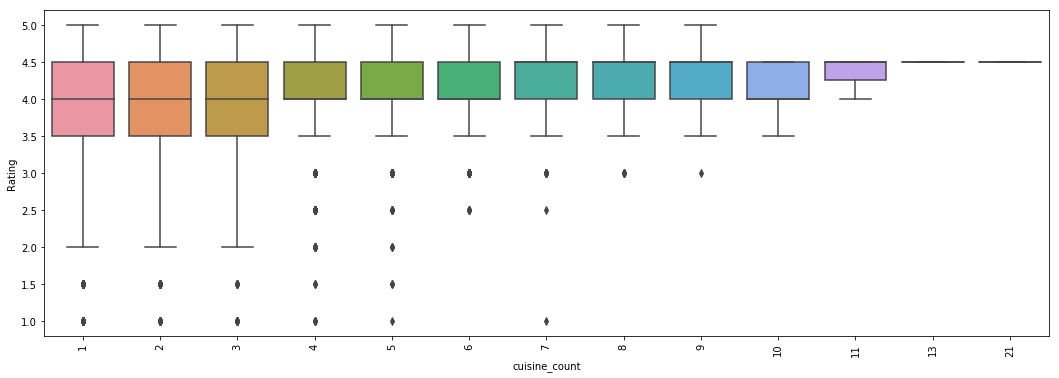

In [54]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='cuisine_count', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

Получается, что около половины ресторанов "узконаправленные", т.е специализируются только на одном виде кухни. Рестораны, в которых представлено более 10ти видов кухонь, встречаются редко. Возможно, будет полезным сузить диапазон количества кухонь в ресторане. Для этого создадим три категории ресторанов: 1 - узкоспециализированные (для ресторанов с 1-3 кухнями), 2 - разнообразная кухня (где представлено 4-10 кухонь), 3 - много кухонь (11 и больше). Как видно выше из боксплотов, в узкоспециализированных ресторанах разбежка рейтинга самая большая (но скорее всего из-за того, что таких ресторанов больше всего).

In [55]:
data['cuisine_count_cat'] = data['cuisine_count'].apply(
    lambda x: 2 if (x>3 and x<11) else (3 if x>=11 else x))

!!! Предварительный запуск показывает, что этот признак не улучшил модель. Удалим его позже, после анализа корреляции.

Попробуем добавить еще один новый признак - наличие в ресторане местной кухни, ведь туристы - частые посетители ресторанов -  заинтересованы в том, чтобы попробовать что-то локальное.
Для этого создадим сначала сначала словарь "тип кухни - город", потом добавим столбец local, указывающий на то, есть ли в ресторане местная кухня ( 1- да, 2 - нет)

In [56]:
#создадим словарь местных кухонь для имеющихся у нас гродов
local_kitchens_dict = {
    'London': 'British',
    'Edinburgh': 'Scottish',
    'Paris': 'French',
    'Lyon': 'French',
    'Madrid': 'Spanish',
    'Barcelona': 'Spanish',
    'Berlin': 'German',
    'Hamburg': 'German',
    'Munich': 'German',
    'Milan': 'Italian',
    'Rome': 'Italian',
    'Prague': 'Czech',
    'Lisbon': 'Portuguese',
    'Porto': 'Portuguese',
    'Vienna': 'Austrian',
    'Amsterdam': 'Dutch',
    'Brussels': 'Belgian',
    'Stockholm': 'Swedish',
    'Budapest': 'Hungarian',
    'Warsaw': 'Polish', 
    'Krakow': 'Polish',
    'Dublin': 'Irish',
    'Copenhagen': 'Danish',
    'Athens': 'Greek',
    'Zurich': 'Swiss',
    'Geneva': 'Swiss',
    'Oslo': 'Norwegian',
    'Helsinki': 'Finnish',
    'Bratislava': 'Slovakian',
    'Luxembourg': 'Luxembourgish',
    'Ljubljana': 'Slovenian'
}


In [57]:
def if_local_cuisine(row):
    for key in local_kitchens_dict:
        if key == row['City']:
            if local_kitchens_dict[key] in row['Cuisine Style']:
                return 1
            else:
                return 0

In [58]:
data['local'] = data.apply(lambda row: if_local_cuisine(row), axis=1)

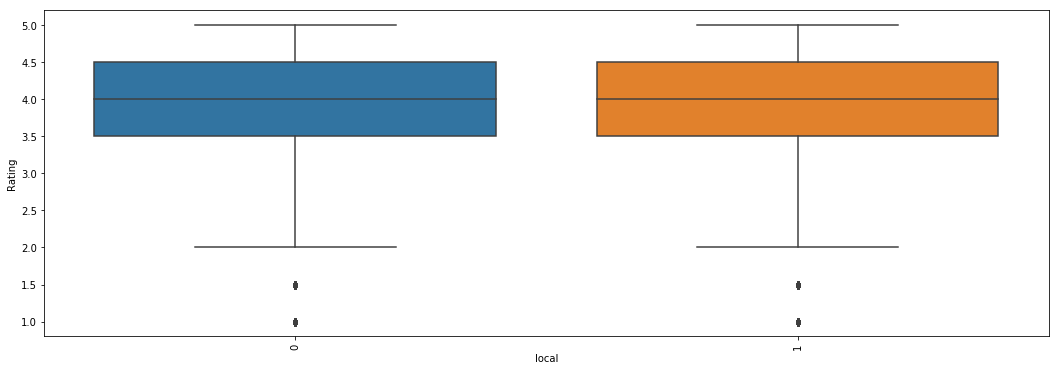

In [59]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='local', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

На боксплотах не видно особого влияния local на целевую переменную. Но пока оставим и этот признак.

# Ranking

Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города. Посмотрим, какая информация содержится, есть ли пропуски:

In [60]:
data.Ranking.value_counts(dropna=False)

93.0       22
72.0       21
491.0      21
842.0      21
1013.0     20
           ..
8027.0      1
10415.0     1
14621.0     1
11766.0     1
10585.0     1
Name: Ranking, Length: 12975, dtype: int64

Количественный столбец. Пропусков нет.
Посмотрим, как распределены значения признака.

In [61]:
data.Ranking.describe()

count    50000.000000
mean      3664.427520
std       3700.092452
min          1.000000
25%        972.000000
50%       2278.000000
75%       5241.000000
max      16444.000000
Name: Ranking, dtype: float64

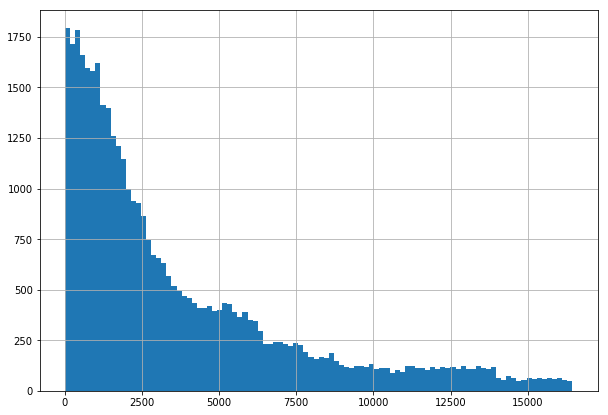

In [62]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

Средний Ranking ресторанов 3664. Много ресторанов не дотягивает и до 2500 места. Рассмотрим, как распределяется Ranking по городам.

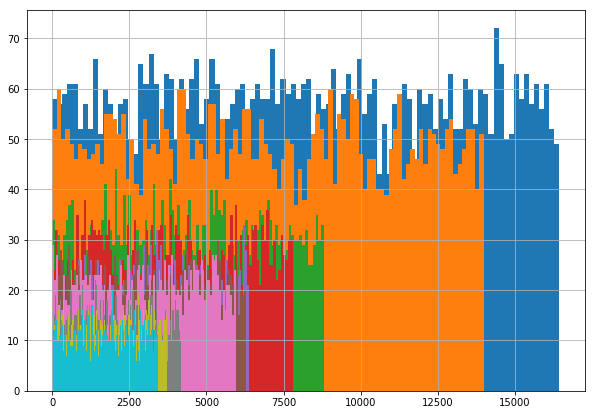

In [63]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за этого имеем смещение.

Посмотрим распределение целевой переменной относительно признака.

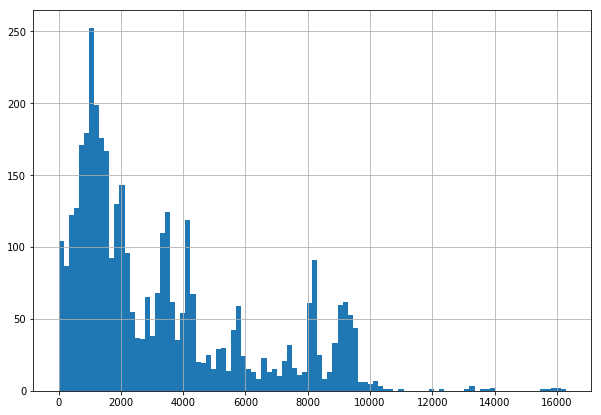

In [64]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

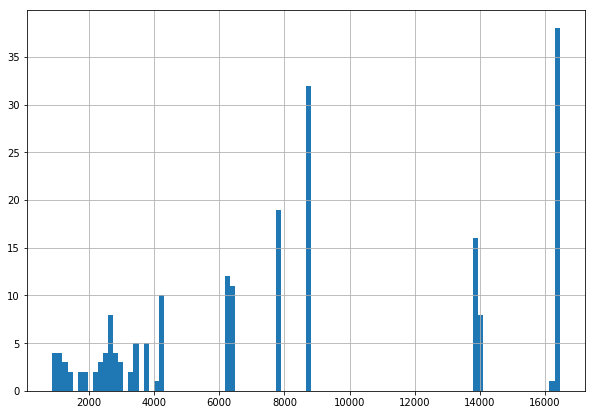

In [65]:
df_train['Ranking'][df_train['Rating'] == 1].hist(bins=100)

Видно, что рестораны с низким Ranking-ом чаще имеют высокий рейтинг, чем рестораны с высоким.
Использовать признак для обучения модели в таком виде, как он есть, кажется не совсем логичным, так как в столбце представлены места ресторанов для разных городов. И Ranking, например, "1000" для большого и маленького города может иметь совершенно разное значение. Возможно, будет полезным унифицировать признак. Например, поместить Ranking каждого ресторана между 0 и 1. Где 0 - для ресторана с самым низким (топовым) Ranking в городе, 1 - для ресторана с самым высоким значением Ranking. Соответственно, чем ближе новый Ranking будет к значению 0, тем выше его место в городе.

In [66]:
#найдем максимальное значение Ranking для каждого города
max_ranking = data.groupby(['City'])['Ranking'].max()
max_ranking

City
Amsterdam      3254.0
Athens         1787.0
Barcelona      7796.0
Berlin         6372.0
Bratislava      889.0
Brussels       3006.0
Budapest       2440.0
Copenhagen     1964.0
Dublin         1960.0
Edinburgh      1766.0
Geneva         1413.0
Hamburg        2737.0
Helsinki       1141.0
Krakow         1244.0
Lisbon         3717.0
Ljubljana       468.0
London        16444.0
Luxembourg      621.0
Lyon           2666.0
Madrid         8809.0
Milan          6275.0
Munich         2763.0
Oslo           1137.0
Paris         13986.0
Porto          1484.0
Prague         4188.0
Rome           5948.0
Stockholm      2464.0
Vienna         3444.0
Warsaw         2154.0
Zurich         1601.0
Name: Ranking, dtype: float64

In [67]:
#функция для преобразования текущего Ranking в Ranking, принимающий значения от 0 до 1
def get_new_ranking(row):
    new_value = (row['Ranking'] - 1)/(max_ranking[row['City']])
    return new_value


In [68]:
#добавим столбец, в котором Ranking-у будет присвоено значение от 0 до 1
data['new_ranking'] = data.apply(lambda row: get_new_ranking(row), axis=1)

# Reviews

Рассмотрим, какая информация содержится в данном столбце и есть ли тут пропуски

In [69]:
data.Reviews.value_counts(dropna=False)

[[], []]                                                                                                                8112
NaN                                                                                                                        2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]                             2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]               2
[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]                                    2
                                                                                                                        ... 
[['lovely place to nurse a hangover.', 'Brilliant Club... Recommend it all day'], ['10/12/2017', '09/26/2017']]            1
[['Date', 'Renaissance of a great movie house'], ['03/09/2017', '02/13/2017']]                                             1


Как видно выше, пропусков много. 2 NaN и остальные - в виде [[], []]. 
Некоторые отзывы повторяются, что тоже подлежит дальнейшему рассмотрению.
Также видно, что в столбце содержаться строки с отзывами и датой отзывов в неудобном для работы формате. Далее обработаем строки, чтобы извлечь из них максимум полезной информации.

Посмотрим, какие отзывы повторяются

In [70]:
data[data.Reviews == "[['Happened to drop in', 'Right for a quick bite'], ['11/30/2016', '06/20/2015']]"]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Swedish,Cambodian,Colombian,Uzbek,Welsh,Chilean,cuisine_count,cuisine_count_cat,local,new_ranking
18421,id_3811,Madrid,[Spanish],3813.0,1,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531,1,...,0,0,0,0,0,0,1,1,1,0.432739
34545,id_3805,Madrid,[Spanish],3807.0,1,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531,1,...,0,0,0,0,0,0,1,1,1,0.432058


Похоже, данные дублируются. Отличия только в не совсем понятных признаках Restaurant_id и Ranking. Не будем удалять эти дубликаты, т.к. по условиям задания этого делать нежелательно.

Далее заполним NaN значением '[[], []]' для удобства, чтобы все пропуски в столбце были одинаковыми

In [71]:
data.Reviews.fillna('[[], []]', inplace=True)

In [72]:
data.Reviews.value_counts()

[[], []]                                                                                                           8114
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]                          2
[['Great Asian Option', 'Wow'], ['10/16/2017', '09/07/2016']]                                                         2
[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]         2
[['Improve your service', 'Great value chain restaurant'], ['12/14/2017', '07/30/2017']]                              2
                                                                                                                   ... 
[['lovely place to nurse a hangover.', 'Brilliant Club... Recommend it all day'], ['10/12/2017', '09/26/2017']]       1
[['Date', 'Renaissance of a great movie house'], ['03/09/2017', '02/13/2017']]                                        1
[['Real Korean food', '👌🏼'], ['11/10/201

Создадим функции, с помощью которых разъединим текст и даты.


In [73]:
#функция, которая будет возвращать текст Reviews
def find_reviews_text(cell):
    #убираем открывающие и закрывающие скобки с начала и конца строки, заменяем двойные кавычки на одиночные
    new_cell = cell.replace('[[','').replace(']]','').replace('"', '\'') 
    #определяем разделитель текста и дат
    sep = '\'],'
    #находим позицию разделителя в тексте
    pos_sep = new_cell.find(sep)
    if pos_sep == -1: 
        return ''
    #возвращаем текст ревью, который находится до разделителя
    #убираем ненужный символ кавычек и преобразуем строку в список
    return new_cell[0:pos_sep+1].replace('],',';').replace('\'','').split(';')

In [74]:
#функция, которая будет возвращать даты Reviews
def find_reviews_dates(cell):
    #убираем открывающие и закрывающие скобки с начала и конца строки, заменяем двойные кавычки на одиночные
    new_cell = cell.replace('[[','').replace(']]','').replace('"', '\'') 
    #определяем разделитель текста и дат
    sep = '[\''
    #находим позицию разделителя в тексте
    pos_sep = new_cell.find(sep)
    if pos_sep == -1: 
        return ''
    #возвращаем даты ревью, которые находится после разделителя
    #убираем ненужный символ кавычек и преобразуем строку в список
    #отсортируем список дат
    return sorted(new_cell[pos_sep+1:].replace('\'','').split(','))

Добавим столбец review_text, куда поместим текст отзывов. Создадим временную колонку dates, куда поместим только даты отзывов. Позже создадим колонки review_date_1 и review_date_2, куда поместим даты по-отдельности.

In [75]:
data['review_text'] = data['Reviews'].apply(lambda cell: find_reviews_text(cell))

In [76]:
data['dates'] = data['Reviews'].apply(lambda cell: find_reviews_dates(cell))

In [77]:
data.dates.head(10)

0                             
1    [ 10/29/2017, 12/05/2017]
2    [ 12/06/2017, 12/28/2017]
3    [ 11/22/2017, 12/06/2017]
4    [ 01/24/2018, 02/08/2018]
5    [ 09/02/2017, 09/07/2017]
6                             
7                             
8    [ 10/11/2017, 01/07/2018]
9    [ 10/29/2017, 12/02/2017]
Name: dates, dtype: object

Разделим даты ревью по разным столбцам

In [78]:
#поместим в столбец review_date_1 первую дату списка (более старую)
#в слуае с отсутствием отзывов это будет nan
#в случае, если дата только одна - в этой колонке тоже nan
data['review_date_1'] = data.dates.apply(lambda x: x[0] if len(x)==2 else np.nan)


In [79]:
#поместим в столбец review_date_2 вторую дату списка (более свежую)
#в случае отсутствия даты - заполним nan
data['review_date_2'] = data.dates.apply(lambda x: x[1] if len(x)==2 else (x[0] if len(x)==1 else np.nan))

In [80]:
data.review_date_2.value_counts(dropna=False)

NaN           8114
01/07/2018     607
01/03/2018     534
01/06/2018     498
01/04/2018     461
              ... 
11/17/2012       1
09/24/2009       1
09/26/2010       1
08/19/2013       1
05/01/2014       1
Name: review_date_2, Length: 1977, dtype: int64

Поменяем формат дат на datetime

In [81]:
data['review_date_1'] = pd.to_datetime(data['review_date_1'])
data['review_date_2'] = pd.to_datetime(data['review_date_2'])

In [82]:
data[data['review_date_2'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Welsh,Chilean,cuisine_count,cuisine_count_cat,local,new_ranking,review_text,dates,review_date_1,review_date_2
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,2,2,0,0.926784,,,NaT,NaT
6,id_6,Lisbon,"[European, Portuguese]",3704.0,1,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,...,0,0,2,2,1,0.996234,,,NaT,NaT
7,id_7,Budapest,[Other],2330.0,2,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,...,0,0,1,1,0,0.954508,,,NaT,NaT
18,id_18,Vienna,[Other],3360.0,2,2.0,"[[], []]",/Restaurant_Review-g190454-d8435085-Reviews-An...,d8435085,0,...,0,0,1,1,0,0.975319,,,NaT,NaT
20,id_20,Barcelona,[Other],6085.0,2,8.0,"[[], []]",/Restaurant_Review-g187497-d8334752-Reviews-Re...,d8334752,0,...,0,0,1,1,0,0.780400,,,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,id_924,Lyon,[Other],925.0,2,29.0,"[[], []]",/Restaurant_Review-g187265-d5850306-Reviews-Re...,d5850306,1,...,0,0,1,1,0,0.346587,,,NaT,NaT
49986,id_7274,Madrid,[Other],7279.0,2,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,1,...,0,0,1,1,0,0.826200,,,NaT,NaT
49988,id_4968,Berlin,[Other],4970.0,2,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,...,0,0,1,1,0,0.779818,,,NaT,NaT
49991,id_6655,Paris,"[French, Contemporary, Fusion, Gastropub]",6656.0,2,5.0,"[[], []]",/Restaurant_Review-g187147-d13224611-Reviews-L...,d13224611,1,...,0,0,4,2,1,0.475833,,,NaT,NaT


Дальше создадим признак, который показывает частоту оставления отзывов о ресторане. Для этого найдем дельту между датами.
NaN значения в столбце 'review_date_1' заменим самой новой датой отзыва, а в столбце 'review_date_2' - самой старой датой отзыва. Так, большая дельта будет говорить о редкости отзывов. В случае с наличием только одной даты - для старой даты дельта будет так же большая, что может говорить о непопулярности или закрытии ресторана, для новой даты дельта будет маленькая, что может говорить о том, что ресторан недавно открылся.

In [83]:
data['review_date_1'].fillna(data['review_date_1'].max(), inplace=True)
data['review_date_2'].fillna(data['review_date_2'].min(), inplace=True)

Добавим новый признак - количество дней между отзывами

In [84]:
data['days_bw_reviews'] = abs(data['review_date_2'] - data['review_date_1']).dt.days

In [85]:
data['days_bw_reviews'].value_counts(dropna=False)

5059    8115
1        829
0        631
2        629
3        607
        ... 
1266       1
1702       1
1798       1
1990       1
1343       1
Name: days_bw_reviews, Length: 1879, dtype: int64

И еще один новый признак - "свежесть" отзыва. Важно не только, как часто оставляют отзывы, но и когда был оставлен последний отзыв о ресторане. Для этого найдем самую последнюю дату отзывов из 'review_date_2' и будем сравнивать остальные даты с ней. Результат поместим в столбец 'last_till_newest'. NaN в столбце 'review_date_2' мы заменили самой старой датой, поэтому отсутствие данных об отзывах будет считаться "несвежестью".

In [86]:
#найдем самую последнюю дату отзывов
newest_date = data['review_date_2'].max()
newest_date

Timestamp('2018-02-26 00:00:00')

In [87]:
data['last_till_newest'] = data['review_date_2'].apply(lambda x: newest_date-x)
data['last_till_newest'] = data['last_till_newest'].dt.days.astype('int16')

# Number of Reviews

Посмотрим, какие данные содержатся в этом столбце и есть ли пропуски.

In [88]:
data['Number of Reviews'].value_counts(dropna=False)

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1574, dtype: int64

Как видно, пропусков очень много.

У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. C пропусками нужно быть внимательным, даже отсутствие информации может быть важным признаком! По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак.

In [89]:
# вынесем информацию о пропусках как отдельный признак
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

!!! Тестовый запуск показывает, что этот признак немного ухудшает модель. Посмотрим после анализа корреляций.

Дальше посмотрим, говорит ли наличие пропусков о том, что у ресторана действительно нет отзывов.

In [90]:
data[data['Number of Reviews'].isna()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,cuisine_count_cat,local,new_ranking,review_text,dates,review_date_1,review_date_2,days_bw_reviews,last_till_newest,Number_of_Reviews_isNAN
7,id_7,Budapest,[Other],2330.0,2,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,...,1,0,0.954508,,,2018-02-26,2004-04-21,5059,5059,1
25,id_25,Madrid,[Other],5828.0,2,NaN,"[[], []]",/Restaurant_Review-g187514-d13202032-Reviews-W...,d13202032,0,...,1,0,0.661483,,,2018-02-26,2004-04-21,5059,5059,1
53,id_53,Prague,[Other],2095.0,2,NaN,"[[], []]",/Restaurant_Review-g274707-d7124128-Reviews-Ch...,d7124128,0,...,1,0,0.500000,,,2018-02-26,2004-04-21,5059,5059,1
74,id_74,Prague,"[Cafe, European, Czech]",2052.0,1,NaN,"[[""Nova' Doba""], ['01/26/2017']]",/Restaurant_Review-g274707-d12032989-Reviews-C...,d12032989,0,...,3,1,0.489733,[Nova Doba],[01/26/2017],2018-02-26,2017-01-26,396,396,1
81,id_81,Barcelona,"[Peruvian, South American]",4325.0,2,NaN,"[[], []]",/Restaurant_Review-g187497-d10088997-Reviews-N...,d10088997,0,...,2,0,0.554643,,,2018-02-26,2004-04-21,5059,5059,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,id_5720,Rome,[Other],5722.0,2,NaN,"[[], []]",/Restaurant_Review-g187791-d793376-Reviews-Wes...,d793376,1,...,1,0,0.961836,,,2018-02-26,2004-04-21,5059,5059,1
49972,id_2009,Prague,"[Cafe, Delicatessen, Healthy, Wine Bar, Street...",2012.0,1,NaN,"[['Personal expirence'], ['10/27/2017']]",/Restaurant_Review-g274707-d12981295-Reviews-M...,d12981295,1,...,2,0,0.480181,[Personal expirence],[10/27/2017],2018-02-26,2017-10-27,122,122,1
49986,id_7274,Madrid,[Other],7279.0,2,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,1,...,1,0,0.826200,,,2018-02-26,2004-04-21,5059,5059,1
49988,id_4968,Berlin,[Other],4970.0,2,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,1,...,1,0,0.779818,,,2018-02-26,2004-04-21,5059,5059,1


Как видно - не все рестораны со значением NaN в столбце действительно не имеют отзывов. Заполним NaN в этих случаях количеством отзывов, основываясь на данных из Reviews.

In [91]:
data['Number of Reviews'].value_counts(dropna=False)

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Number of Reviews, Length: 1574, dtype: int64

In [92]:
#заполним ячейки значением 0 вместо NaN,если отзывов не предоставлено 
data.loc[(data['Reviews'] == '[[], []]') & (data['Number of Reviews'].isna()), 'Number of Reviews'] = 0

In [93]:
data['Number of Reviews'].value_counts(dropna=False)

2.0       2403
3.0       2042
0.0       2024
4.0       1707
5.0       1471
          ... 
1968.0       1
4738.0       1
2356.0       1
2006.0       1
1543.0       1
Name: Number of Reviews, Length: 1575, dtype: int64

In [94]:
def get_number(row):
    if row['Number of Reviews'] >= 0:
        number = row['Number of Reviews']
    else:
        number = len(row['review_text'])
    return number

In [95]:
#заполним NaN значениями 1 или 2, в зависимости от количества отзывов в списке review_text
data['Number of Reviews'] = data.apply(lambda row: get_number(row), axis=1)

In [96]:
data['Number of Reviews'].value_counts(dropna=False)

2.0       2405
3.0       2042
0.0       2024
4.0       1707
5.0       1471
          ... 
1968.0       1
4738.0       1
2356.0       1
2006.0       1
1543.0       1
Name: Number of Reviews, Length: 1575, dtype: int64

Так мы заменили часть пропусков. 
Однако смущает, что есть Number of Reviews не нулевое там, где отзывы отсутствуют. Возможно, отзывы были оставлены пустые? Оставим, как есть.

Number of Reviews может оказаться достаточно значимым признаком для модели. Для более корректных результатов, возможно, имеет смысл, как и в случае с Ranking, рассматривать это число по отдельным городам. Т.к. 1000 отзывов для Лондона, например, и Люксембурга могут иметь разное значение. Для этого добавим столбец, в котором будет отображено процентное количество отзывов о ресторане в сравнении со всеми ресторанами одного города.

In [97]:
#найдем максимальное значение Number of Reviews для каждого города
max_reviews = data.groupby(['City'])['Number of Reviews'].max()
max_reviews

City
Amsterdam     6777.0
Athens        4234.0
Barcelona     4996.0
Berlin        2572.0
Bratislava    2578.0
Brussels      6437.0
Budapest      7575.0
Copenhagen    3426.0
Dublin        3491.0
Edinburgh     4567.0
Geneva        1624.0
Hamburg        845.0
Helsinki      1488.0
Krakow        4608.0
Lisbon        3404.0
Ljubljana     2006.0
London        9660.0
Luxembourg     652.0
Lyon          1953.0
Madrid        6013.0
Milan         6360.0
Munich        4694.0
Oslo          1391.0
Paris         7622.0
Porto         3206.0
Prague        4521.0
Rome          8927.0
Stockholm     1461.0
Vienna        4937.0
Warsaw        2356.0
Zurich        1974.0
Name: Number of Reviews, dtype: float64

In [98]:
#функция для преобразования текущего Number of Reviews в процент от отзывов в городе
def get_new_number(row):
    new_value = row['Number of Reviews']/max_reviews[row['City']] * 100
    return new_value

In [99]:
#создадим новый столбец с информацией о процентном количестве отзывов
data['new_number'] = data.apply(lambda row: get_new_number(row), axis=1)

# URL_TA

Столбец, содержащий ссылку на TripAdvisor. За неимением времени и навыков я решила не парсить ссылки в рамках этого задания. Но из самой ссылки можно вычленить название ресторана, которое может оказаться полезным.

In [100]:
data['restaurant_name'] = data['URL_TA'].apply(lambda x: x.split('-')[4].lower())

In [101]:
data['restaurant_name'].value_counts(dropna=False)[:60]

mcdonald_s                148
burger_king                67
pret_a_manger              61
subway                     59
kfc                        51
pizza_express              43
domino_s_pizza             38
pizza_hut                  34
eat                        34
wagamama                   23
telepizza                  22
itsu                       22
sushi_shop                 19
le_pain_quotidien          19
nando_s                    17
ginos                      15
wasabi                     14
sakura                     13
hippopotamus               13
bagelstein                 13
100_montaditos             12
vapiano                    12
nordsee                    12
chicken_cottage            11
la_tagliatella             11
cafe_te                    11
vips                       11
caffe_nero                 10
hamburguesa_nostra         10
carpe_diem                 10
enrique_tomas              10
llaollao                   10
foster_s_hollywood          9
alice_pizz

In [102]:
#заменим mcdonald_s_restaurant и mcdonalds_restaurants на mcdonald_s
data.loc[data.restaurant_name == 'mcdonald_s_restaurant', 'restaurant_name'] = 'mcdonalds'
data.loc[data.restaurant_name == 'mcdonalds_restaurants', 'restaurant_name'] = 'mcdonalds'
data.loc[data.restaurant_name == 'mc_donald_s', 'restaurant_name'] = 'mcdonalds'
data.loc[data.restaurant_name == 'mcdonald_s', 'restaurant_name'] = 'mcdonalds'
data.loc[data.restaurant_name == 'mcdonald_s_restaurants', 'restaurant_name'] = 'mcdonalds'


In [103]:
data['restaurant_name'].value_counts()

mcdonalds                        170
burger_king                       67
pret_a_manger                     61
subway                            59
kfc                               51
                                ... 
spaghetti_house_goodge_street      1
el_passatge_del_murmuri            1
el_tio_palomo                      1
manneken_pils_brasserie            1
ristorante_la_sardegna             1
Name: restaurant_name, Length: 46264, dtype: int64

Как видно, в нашем датасете содержится много сетевых ресторанов. Для каждой из сети мы можем создать dummy-переменную. Сделаем это только для тех ресторанов, которые встречаются 3 и больше раз, чтобы снизить риски попадания ресторана в "сеть" из-за дубликатов, с которыми мы встречались выше.

In [104]:
#создадим словарь с названием ресторана и количеством в сети
rest_dict = dict(data['restaurant_name'].value_counts())

In [105]:
#создадим список только тех ресторанов, которых 3 и больше
restaurants = set()
for item in rest_dict:
    if rest_dict[item]>=3:
        restaurants.add(item)

In [106]:
# создадим dummy-переменные для каждого ресторана, которых больше 3 в сети
for item in restaurants:
    data[item] = data['restaurant_name'].apply(lambda x: 1 if x==item else 0)

# ID_TA

ID ресторана в TripAdvisor. Посмотрим, что представляет из себя признак, хоть и решено не использовать пока Tripadviser для пополнения данных.

In [107]:
data.ID_TA.value_counts(dropna=False)

d10440367    2
d4748208     2
d5618007     2
d7809594     2
d2010743     2
            ..
d11929432    1
d1756552     1
d4454642     1
d6981875     1
d11660783    1
Name: ID_TA, Length: 49963, dtype: int64

Как видно, это тот же ID, что присутствует в ссылке URL_TA выше. Интересно, что есть дубликаты. 

In [108]:
data[data.ID_TA=='d793170']

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,cafe_creme,cafe_cafe,la_bottega,bobby_burger,pizza_max,l_avenue,museo_del_jamon,yum_yum,belushi_s,the_good_earth
15240,id_2406,Madrid,"[Italian, French, European]",2408.0,2,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170,1,...,0,0,0,0,0,0,0,0,0,0
46822,id_2487,Madrid,"[Italian, French, European]",2489.0,2,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170,1,...,0,0,0,0,0,0,0,0,0,0


Похоже на те же случаи дубликатов, с которыми встречались выше, и которые решено не удалять.

Преобразуем ID_TA в числовой признак

In [109]:
data.ID_TA = data.ID_TA.apply(lambda x: int(x[1:]))

## EDA

### Посмотрим распределение целевой переменной

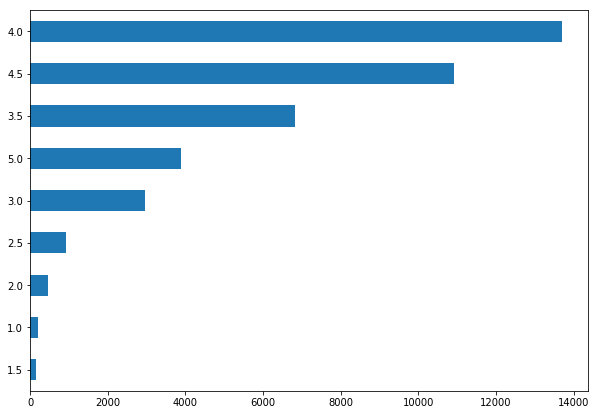

In [110]:
df_train['Rating'].value_counts(dropna=False, ascending=True).plot(kind='barh')

Важно заметить, целевая переменная принимает значения от 1.0 до 5.0, значения кратны 0.5.


### Корреляция признаков


Посмотрим, как связаны признаки с целевой переменной и между собой

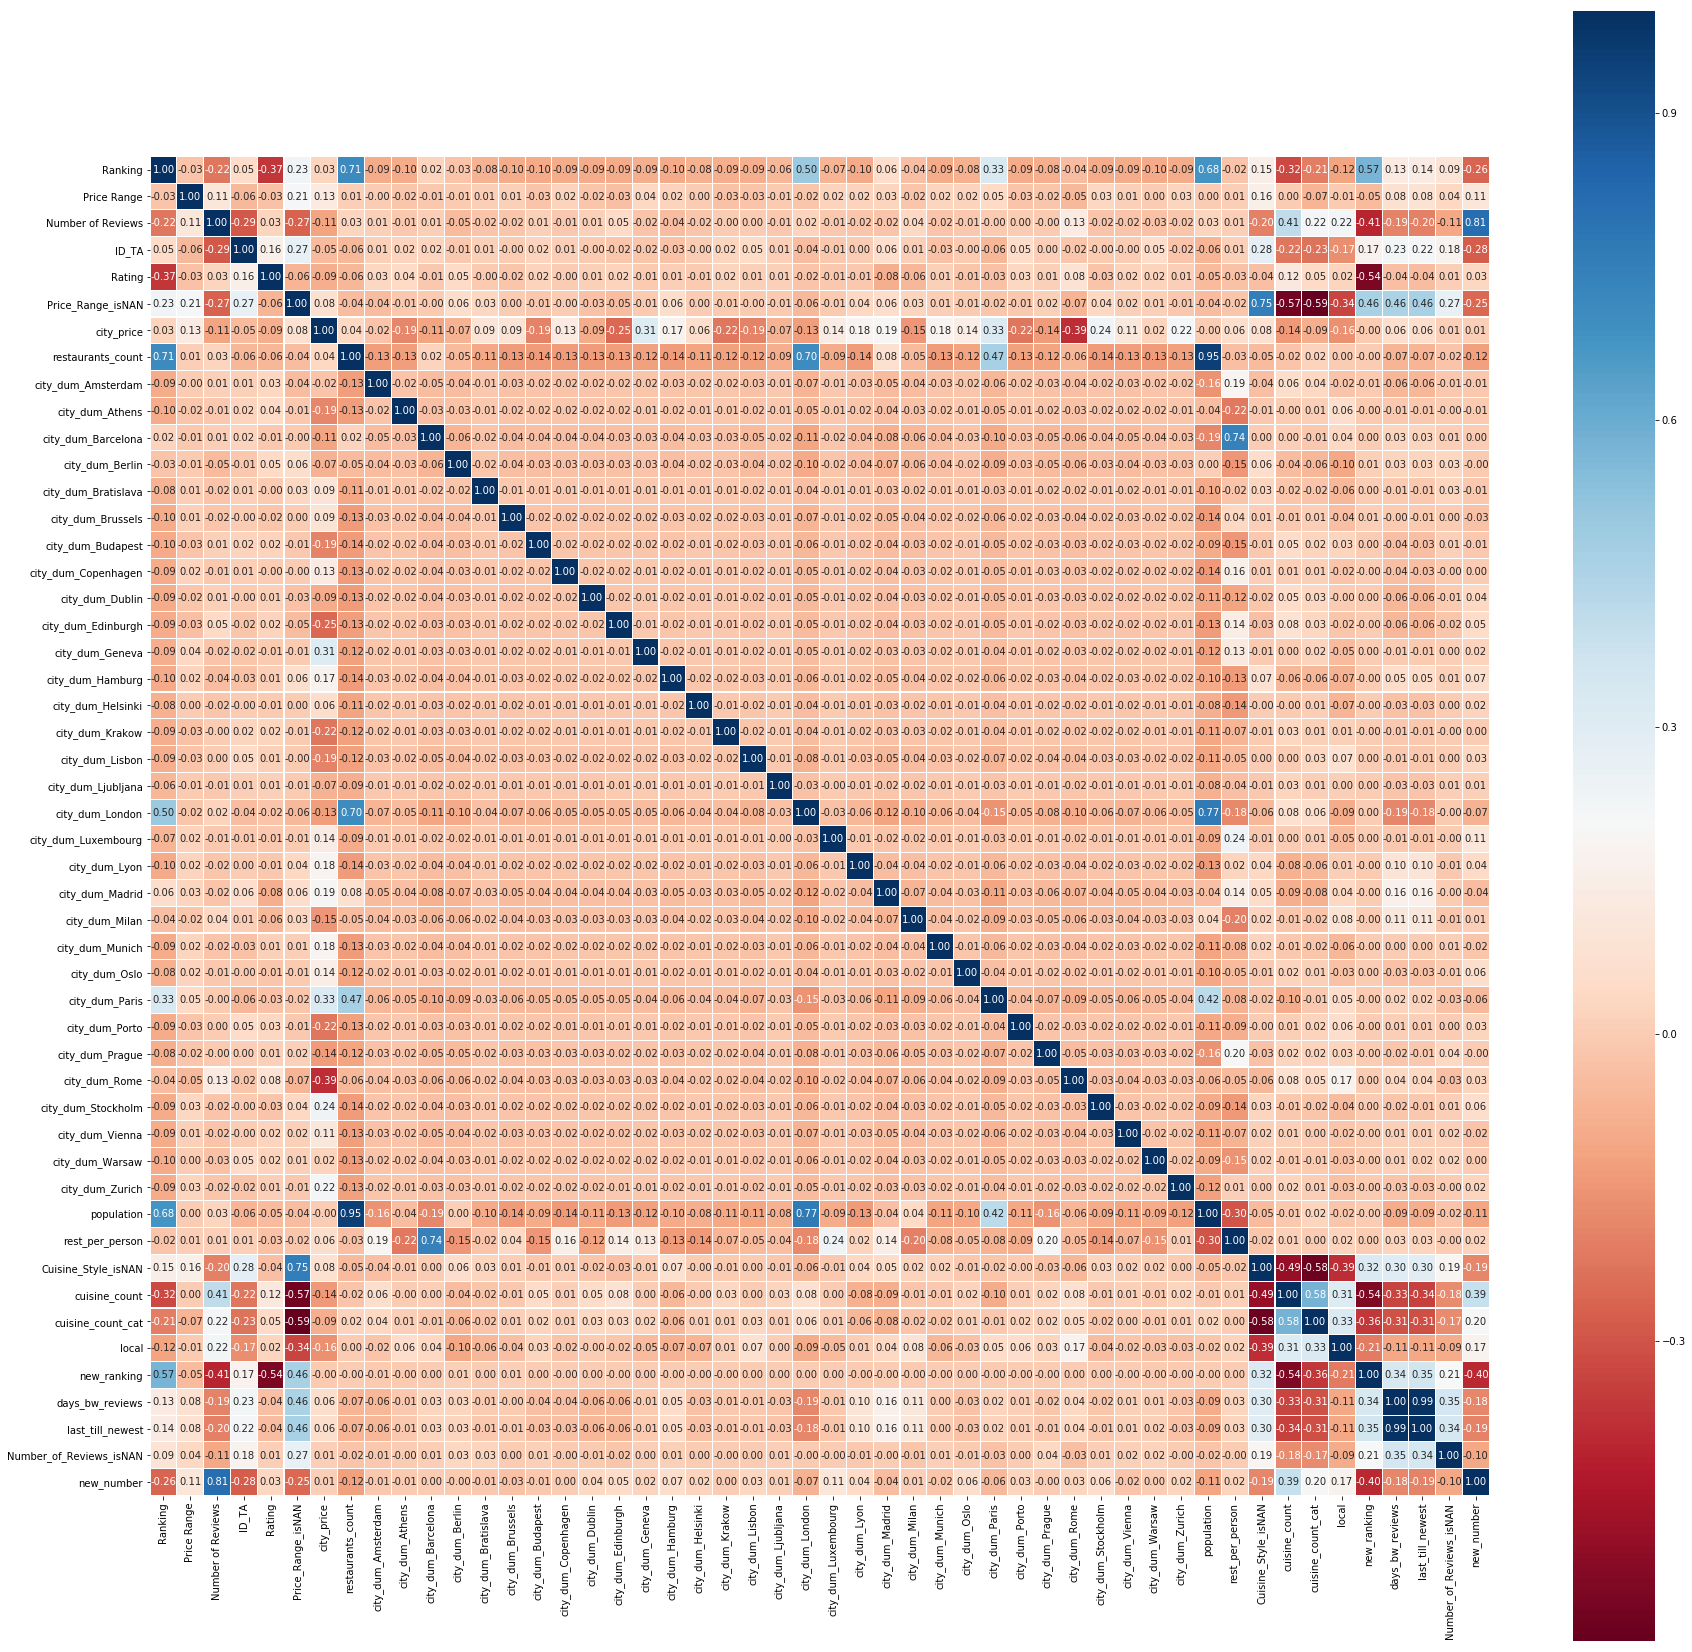

In [111]:
# уберем из анализа dummy кухонь и ресторанов, для лучшей визуализации
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(data[data['sample'] == 1].drop(['sample'], axis=1).drop(all_cuisines, axis=1).drop(
    restaurants, axis=1).corr(),square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");  

Из матрицы видно, что у нас есть признаки, которые сильно коррелируют друг с другом:
1. restaurants_count и population - логично, чем больше населения - тем больше ресторанов. Оставим оба признака, по результатам запуска они тоже одни из самых важных признаков для модели.
2. days_bw_reviews и last_till_newest - возможно, высокая корреляция признаков говорит, что частота написания отзывов примерно одинаковая? оставим оба признака, при удалении одного из них предсказание ухудшается.
3. Number of Reviews и new_number - new_number - процентное количество отзывов в городе, Number of Reviews - количество отзывов в целом. Оставим оба признака, они все же немного разные.
4. Price_Range_isNaN и Cuisine_Style_isNaN - возможно ценовая категория была пропущена для ресторанов без типа кухни или сюда попали ресторны, по которым в целом есть мало информации? пусть тоже остаются оба
5. population/restaurants_count и Ranking - из-за связи с количеством ресторанов, больше ресторанов - больше интервал Ranking-а в городе
6. cuisine_count и cuisine_count_cat - cuisine_count_cat создан из cuisine_count, к тому же ухудшал модель, удалим
7. Ranking и new_Ranking - new_Ranking - более точная позиция ресторана относительно всех ресторанов, Ranking же - только по городу
8. Price_Range_isNaN и cuisine_count/cuisine_count_cat - см пункт 4
9. Cuisine_Style_isNaN и cuisine_count/cuisine_count_cat - см пункт 4
10. у крупных городов как London и Barcelona наблюдается высокая корреляция с признаками population и rest_per_person соответственно

Рассмотрим подробнее, как каждый признак связан именно с целевой переменной

In [112]:
corr_city = data[data['sample'] == 1].drop(['sample'], axis=1).drop(all_cuisines, axis=1).drop(
    restaurants, axis=1).corr().Rating.sort_values(ascending=False).to_frame()
corr_city

,Rating
Rating,1.000000
ID_TA,0.159111
cuisine_count,0.120059
city_dum_Rome,0.083082
cuisine_count_cat,0.047412
city_dum_Berlin,0.046967
city_dum_Athens,0.044792
city_dum_Amsterdam,0.034535
city_dum_Porto,0.031603
new_number,0.030577


In [113]:
corr_full = data[data['sample'] == 1].drop(['sample'], axis=1).corr().Rating.sort_values(
    ascending=False).to_frame()

In [114]:
corr_full[corr_full.Rating.isna()]

,Rating
mango,NaN


In [115]:
corr_full.Rating.fillna(0, inplace=True)

In [116]:
corr_full[:10]

,Rating
Rating,1.000000
ID_TA,0.159111
Vegetarian Friendly,0.128356
Vegan Options,0.122054
cuisine_count,0.120059
Gluten Free Options,0.099455
city_dum_Rome,0.083082
Wine Bar,0.062129
Healthy,0.058532
Mediterranean,0.050665


In [117]:
corr_full[(len(corr_full)-10):]

,Rating
Chinese,-0.056867
city_dum_Milan,-0.059704
restaurants_count,-0.060874
Price_Range_isNAN,-0.064567
mcdonalds,-0.071192
city_dum_Madrid,-0.083462
city_price,-0.088186
Ranking,-0.368371
new_ranking,-0.544702
mango,0.000000


In [118]:
mid_corr = int(len(corr_full)/2)
corr_full[mid_corr-10:mid_corr+50]

,Rating
the_good_burger,0.000090
le_rendez_vous,0.000090
la_bruschetta,0.000090
tapas_y_mas,0.000090
eiscafe_san_remo,0.000090
musashi,0.000074
chop_d,0.000074
cafe_du_marche,0.000074
amorino,0.000074
hare_and_tortoise,0.000074


Топ признаков: **new_ranking**, **Ranking**, **Vegetarian Friendly, Vegan Options**, **cuisine_count**. Из dummy-городов - высокий коэффициент корреляции с Римом и Мадридом. Причем с Мадридом коэффициент отрицательный. Ранее мы видели, что там практически не бывает ресторанов с рейтингом 5.

Самый незначительный не-dummy признак - **Number_of_Reviews_isNAN** - коэффициент только 0.008386, из городов - **city_dum_Hamburg** - 0.006539.

Среди dummy кухонь и ресторанов очень много признаков с очень маленькой корреляцией с целевой переменной.

Подготовим кандидатов на удаление - те признаки, корреляция с целевой переменной которых ниже, чем 0.0099 [включительно].

In [119]:
corr_full[corr_full.index == 'Number_of_Reviews_isNAN']

,Rating
Number_of_Reviews_isNAN,0.008386


In [120]:
to_remove = corr_full[abs(corr_full['Rating']) <= 0.0099].index
to_remove

Index(['Cuban', 'Filipino', 'bacaro', 'loving_hut', 'le_gourmet', 'momento',
       'British', 'Number_of_Reviews_isNAN', 'Austrian', 'city_dum_Zurich',
       ...
       'mme_shawn', 'city_dum_Luxembourg', 'vapiano', 'caffe_concerto',
       'nostrum', 'jamie_s_italian', 'old_wild_west', 'francesca',
       '100_montaditos', 'mango'],
      dtype='object', length=515)

In [121]:
# удалим признаки с низкой корреляцией + те, что ухудшали модель + нечисловые признаки
data.drop('review_date_1', axis=1, inplace=True)
data.drop('review_date_2', axis=1, inplace=True)
data.drop('cuisine_count_cat', axis=1, inplace=True) # ухудшал модель
data.drop(to_remove, axis=1, inplace=True)
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

#### Запускаем и проверяем, что получилось

In [122]:
df_preproc = data

In [123]:
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,ID_TA,sample,Rating,Price_Range_isNAN,city_price,restaurants_count,city_dum_Amsterdam,...,ginos,camden_food_co,yo_sushi,cafe_noir,como_en_casa,speed_rabbit_pizza,caffe_nero,autogrill,lizarran,bobby_burger
41358,1050.0,2,4.0,13114767,1,5.0,0,1.766443,745,0,...,0,0,0,0,0,0,0,0,0,0
26778,861.0,2,345.0,2104071,1,4.5,0,1.788722,2589,0,...,0,0,0,0,0,0,0,0,0,0
34148,1238.0,1,35.0,2175862,1,4.0,0,1.822101,1647,0,...,0,0,0,0,0,0,0,0,0,0
24464,157.0,3,127.0,1503555,1,4.0,0,1.940135,1186,0,...,0,0,0,0,0,0,0,0,0,0
295,786.0,2,0.0,11670765,0,0.0,1,1.763538,554,0,...,0,0,0,0,0,0,0,0,0,0
8722,626.0,2,116.0,1103594,0,0.0,0,1.914761,1443,0,...,0,0,0,0,0,0,0,0,0,0
2806,673.0,2,121.0,2366860,0,0.0,0,1.840308,1816,0,...,0,0,0,0,0,0,0,0,0,0
11655,321.0,2,208.0,1024456,1,4.0,0,1.914761,1443,0,...,0,0,0,0,0,0,0,0,0,0
24947,11633.0,2,4.0,1016501,1,4.5,1,1.861949,7193,0,...,0,0,0,0,0,0,0,0,0,0
19926,3206.0,2,7.0,7098361,1,3.0,1,1.914761,1443,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 184 entries, Ranking to bobby_burger
dtypes: float64(7), int16(1), int64(150), uint8(26)
memory usage: 61.2 MB


Перед тем, как разделить модель на тестовую и тренировочную части, изменим значение целевой переменной Ranking.


In [125]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [126]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [127]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 183), (40000, 183), (40000, 182), (32000, 182), (8000, 182))

# Model 
Сам ML

In [128]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [129]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [130]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
#Округлим предсказанные значения до 0.5 - степени округления целевой переменной
def rating_round(pred):
    return np.round(pred*2)/2
y_pred_round = rating_round(y_pred) 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [131]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_round))

MAE: 0.1645625


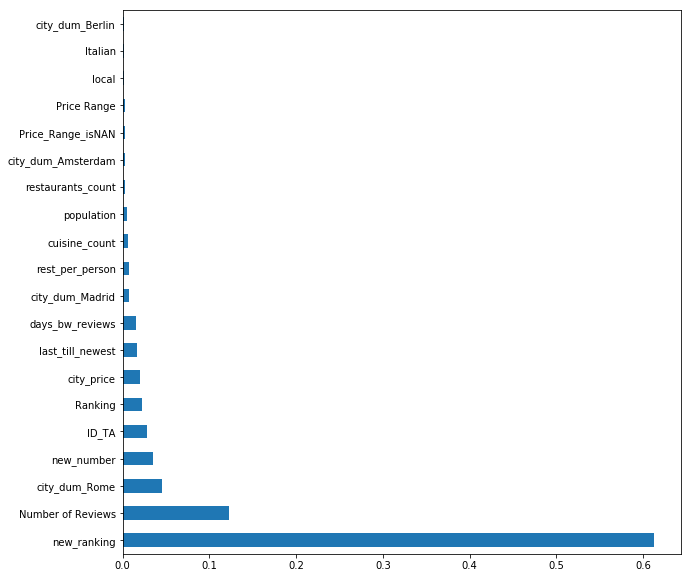

In [132]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [133]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,ID_TA,Rating,Price_Range_isNAN,city_price,restaurants_count,city_dum_Amsterdam,city_dum_Athens,...,ginos,camden_food_co,yo_sushi,cafe_noir,como_en_casa,speed_rabbit_pizza,caffe_nero,autogrill,lizarran,bobby_burger
5398,1831.0,2,495.0,1239113,0.0,0,1.926981,6108,0,0,...,0,0,0,0,0,0,0,0,0,0
8965,12287.0,2,12.0,8305152,0.0,1,1.926981,6108,0,0,...,0,0,0,0,0,0,0,0,0,0
3764,7876.0,2,210.0,6518694,0.0,0,1.916077,3813,0,0,...,0,0,0,0,0,0,0,0,0,0
321,1464.0,2,72.0,3519020,0.0,0,1.856259,3395,0,0,...,0,0,0,0,0,0,0,0,0,0
9705,3771.0,2,4.0,11875197,0.0,0,1.856259,3395,0,0,...,0,0,0,0,0,0,0,0,0,0
3162,502.0,3,14.0,6223052,0.0,0,1.911579,475,0,0,...,0,0,0,0,0,0,0,0,0,0
1075,6185.0,2,14.0,10371291,0.0,0,1.862477,2705,0,0,...,0,0,0,0,0,0,0,0,0,0
6330,7436.0,2,142.0,2001829,0.0,0,1.926981,6108,0,0,...,0,0,0,0,0,0,0,0,0,0
3884,8305.0,2,13.0,3612611,0.0,1,1.861949,7193,0,0,...,0,0,0,0,0,0,0,0,0,0
3726,9705.0,2,44.0,734086,0.0,0,1.861949,7193,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
test_data = test_data.drop(['Rating'], axis=1)

In [135]:
sample_submission.Rating.unique()

array([2. , 2.5, 4. , 1. , 4.5, 3.5, 5. , 1.5, 3. ])

In [136]:
predict_submission = rating_round(model.predict(test_data))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [137]:
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4. ])

In [138]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Чтобы хотела сделала еще (при наличии достаточного количества времени и знаний):

* Подгрузить дополнительные данные, например по количеству туристов или благосостоянию городов
* Использовать ссылки на TripAdvisor для получения дополнительной информации
* Проанализировать текст отзывов и разделить отзывы на отрицательные/положительные/нейтральные
* Проанализировать, почему Price_Range_isNaN и Cuisine_Style_isNaN так скоррелированы
* Попробовать заполнить NaN в Cuisine Style, Price Range для ресторанов с одинаковым названием(из одной сети)
* Больше поработать с Cuisine Style - например, найти самую популярную кухню города (и заполнить этим NaN)/ найти среднюю ценовую категорию для каждого типа кухни/ попробовать объединить типы кухонь в более широкие категории и т.д.
